# Introduction of Essential Tools and Libraries

* **IPython Notebook**


>Kernel: IPython is an alternative Python command line shell for interactive computing with lots of useful enhancements over the "default" Python interpreter.
<br><br>
>Jupyter: The browser-based documents Jupyter Notebook is a great environment for scientific computing: Not only to execute code, but also to add informative documentation via Markdown, HTML, LaTeX, embedded images, and inline data plots.

* **numpy**

>NumPy, short for Numerical Python. It provides the data structures, algorithms, and library glue needed for most scientific applications involving numerical data in Python. 
<br><br>
>Beyond the fast array-processing capabilities that NumPy adds to Python, one of its primary uses in data analysis is as a container for data to be passed between algorithms and libraries.


* **Matplotlib**

>Matplotlib is the most popular Python library for data visualizations which can generate plots, histograms, power spectra, bar charts, error charts, scatter plots, etc., with just a few lines of code. It will helps us to make easy things easy and hard things possible.


* **Seaborn**

>Seaborn is a library for making attractive and informative statistical graphics in Python. It aims to make visualization a central part of exploring and understanding data. And it is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

* **Scikit-learn**

>Scikit-learn is is the most popular general machine library for Python. It includes a broad range of different classifiers, cross-validation and other model selection methods, dimensionality reduction techniques, modules for regression and clustering analysis, and a useful data-preprocessing module.

* **Scikit-image**

>Scikit-image is a collection of algorithms for image processing.

* **pip**

>The PYPA recomneded tool for installing Python packages

* * Install LPP package

>$ pip install lpproj 

In [2]:
from __future__ import print_function
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from skimage import filters
import warnings
warnings.filterwarnings('ignore')

# Loading dataset from fetch_lfw_peoople

In [3]:
print(__doc__)

logging.basicConfig(level=logging.INFO, format='%(asctime)s%(message)s')

#Download the data, if not already on disk and load it as numpy array
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#introspect the images arrays to find the shapes(for plotting)
n_samples, h, w = lfw_people.images.shape

#for machine learning we use tthe 2 data directly(as relative pixel
#positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" %n_features)
print("n_classes: %d" %n_classes)

Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


**Spliting data set as training(90%) and testing(10%)**

In [4]:
#split into a training set and a test set using a stratified k fold

#split into a tranining adn testing set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state = 42)

# PCA Algorithm

**choosing how many component using pca**

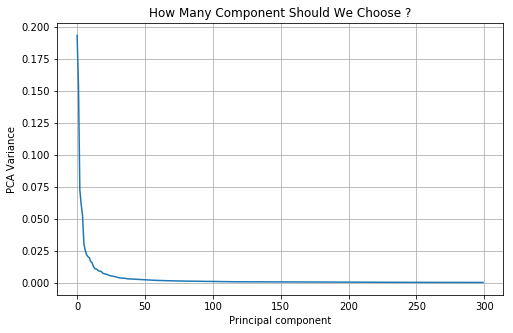

In [5]:

pca = PCA(n_components=300, svd_solver='randomized', whiten=True).fit(X_train)
plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ / sum(pca.explained_variance_))
plt.xlabel('Principal component')
plt.ylabel('PCA Variance')
plt.title('How Many Component Should We Choose ?')
plt.grid(True)
plt.show()

**Implement PCA algorthm**

In [6]:
#Compute a PCA(eigenfaces) on the face dataset(treated as unlabeled 
#dataset): unsupervised feature extraction/dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" %(n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components = n_components, svd_solver='randomized',whiten=True).fit(X_train)
print("done in %0.3fs" %(time()- t0))

Extracting the top 150 eigenfaces from 1159 faces
done in 0.123s


**Project data on the eigenfaces**

In [7]:
eigenfaces = pca.components_.reshape(n_components,h,w)
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" %(time()-t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.021s


**Using training data fitting SVM model**

In [8]:
#Train a SVM classification model
print("---------------Eigenface--------------------------")
print("Fitting the SVM classifier to the PCA training set")
t0 = time()
param_grid={'C':[1e3, 5e3, 1e4, 5e4, 1e5],
            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf = GridSearchCV(SVC(kernel = 'rbf', class_weight = 'balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("--------------------------------------")
print("done in %0.3fs" %(time()-t0))
print("---------------------------------------")
print("Best estimator found by grid search:")
print(clf.best_estimator_)

---------------Eigenface--------------------------
Fitting the SVM classifier to the PCA training set
--------------------------------------
done in 30.276s
---------------------------------------
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


**Using training data fitting KNN model**

In [9]:
# Train a KNN classification model
print("---------------Eigenface--------------------------")
print("Fitting the SVM classifier to the training set")
t0 = time()
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train_pca, y_train) 
print("----------------------------------")
print("done in %0.3fs" %(time()-t0))
print("-----------------------------------")

---------------Eigenface--------------------------
Fitting the SVM classifier to the training set
----------------------------------
done in 0.007s
-----------------------------------


**calculate accuracy depends on SVM model**

In [11]:
#Quantitative evaluation of the SVM model quality on the test set
print("---------------Eigenface--------------------------")
print("Predicting people's names on the test set")
t0 = time()
svm_pred = clf.predict(X_test_pca)
svc_accuracy = accuracy_score(y_test, svm_pred)*100
print("Done in %0.35s" %(time() - t0))
print("-----------------------------------------------------------")
print("SVM Accuracy Score: {:0.3f}%".format(svc_accuracy))
print("-----------------------------------------------------------")
print(classification_report(y_test, svm_pred, target_names = target_names))
print(confusion_matrix(y_test, svm_pred, labels = range(n_classes)))

---------------Eigenface--------------------------
Predicting people's names on the test set
Done in 0.0271620750427
-----------------------------------------------------------
SVM Accuracy Score: 89.147%
-----------------------------------------------------------
                   precision    recall  f1-score   support

     Ariel Sharon       0.80      1.00      0.89         4
     Colin Powell       0.79      0.92      0.85        25
  Donald Rumsfeld       1.00      0.43      0.60         7
    George W Bush       0.91      0.96      0.93        67
Gerhard Schroeder       1.00      0.92      0.96        13
      Hugo Chavez       1.00      0.25      0.40         4
       Tony Blair       0.89      0.89      0.89         9

      avg / total       0.90      0.89      0.88       129

[[ 4  0  0  0  0  0  0]
 [ 1 23  0  1  0  0  0]
 [ 0  1  3  3  0  0  0]
 [ 0  3  0 64  0  0  0]
 [ 0  1  0  0 12  0  0]
 [ 0  1  0  1  0  1  1]
 [ 0  0  0  1  0  0  8]]


**Calculate accuracy depends on KNN model**

In [12]:
#Quantitative evaluation of the KNN model quality on the test set
print("---------------Eigenface--------------------------")
print("Predicting people's names on the test set")
t0 = time()
knn_pred = neigh.predict(X_test_pca)

knn_accuracy = accuracy_score(y_test, knn_pred)*100
print("Done in %0.35s" %(time() - t0))
print("-------------------------------------------------")
print("KNN Accuracy Score: {:0.3f}%".format(knn_accuracy))
print("-------------------------------------------------")
print(classification_report(y_test, knn_pred, target_names = target_names))
print(confusion_matrix(y_test, knn_pred, labels = range(n_classes)))

---------------Eigenface--------------------------
Predicting people's names on the test set
Done in 0.0450639724731
-------------------------------------------------
KNN Accuracy Score: 65.891%
-------------------------------------------------
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.25      0.40         4
     Colin Powell       1.00      0.52      0.68        25
  Donald Rumsfeld       0.50      0.14      0.22         7
    George W Bush       0.62      0.99      0.76        67
Gerhard Schroeder       1.00      0.08      0.14        13
      Hugo Chavez       0.00      0.00      0.00         4
       Tony Blair       0.60      0.33      0.43         9

      avg / total       0.71      0.66      0.60       129

[[ 1  0  0  3  0  0  0]
 [ 0 13  1 11  0  0  0]
 [ 0  0  1  5  0  0  1]
 [ 0  0  0 66  0  0  1]
 [ 0  0  0 12  1  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  6  0  0  3]]


**Plot Original photos**

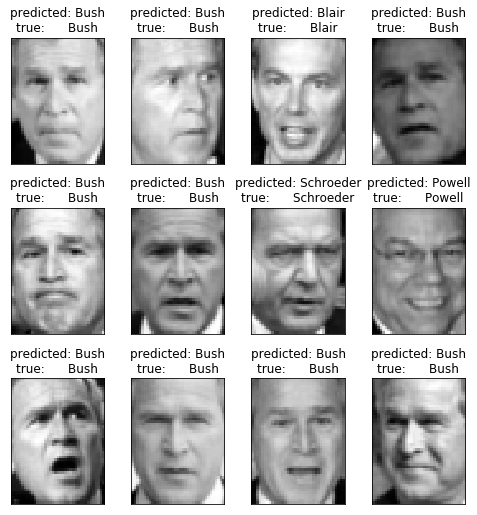

In [13]:
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row = 3, n_col=4):
    """Helper function to plot a gallery of portraints"""
    plt.figure(figsize=(1.8*n_col, 2.4*n_row))
    plt.subplots_adjust(bottom = 0, left = 0.1, right = .99, top = .90, hspace = .35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
        
#plot the result of the prediction on a portion of the test set

def title(svm_pred, y_test, target_names, i):
    pred_name = target_names[svm_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(svm_pred, y_test, target_names, i)
                     for i in range(svm_pred.shape[0])]


plot_gallery(X_test, prediction_titles, h, w)

**Plot eigenfaces**

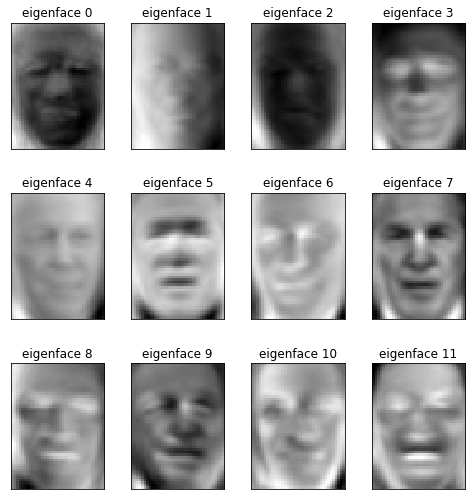

In [14]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" %i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

# LDA Algorithom

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import math
from skimage import exposure
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

**Implement LDA algorithm**

In [16]:
lda = LDA(n_components=150)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

**project input data to fisherface**

In [17]:
X_train_ff = np.zeros(X_train.shape)
X_test_ff = np.zeros(X_test.shape)

for i in range(X_train.shape[0]):
    hog_vec, hog_vis = hog(X_train[i].reshape(h,w), visualise=True)
    X_train_ff[i] = hog_vis.flat
for i in range(X_test.shape[0]):
    hog_vec, hog_vis = hog(X_test[i].reshape(h,w), visualise=True)
    X_test_ff[i] = hog_vis.flat

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_ff)
X_test_sc = sc.transform(X_test_ff)

**Using training data fitting the SVM model**

In [18]:
#Train a SVM classification model
print("---------------Fisherface--------------------------")
print("Fitting the SVM classifier to the training set")
t0 = time()
clf.fit(X_train_lda, y_train)
print("done in %0.3fs" %(time()-t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

---------------Fisherface--------------------------
Fitting the SVM classifier to the training set
done in 0.643s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


**Using test data calculate accuracy depends on SVM**

In [20]:
print("---------------Fisherface--------------------------")
print("Predicting people's names on the test set")
t0 = time()
svm_pred = clf.predict(X_test_lda)
svm_accuracy = accuracy_score(y_test, svm_pred)*100
print("Done in %0.35s" %(time() - t0))
print("----------------------------------------------------")
print("SVM Accuracy Score: {:0.3f}%".format(svm_accuracy))
print("----------------------------------------------------")
print(classification_report(y_test, svm_pred, target_names = target_names))
print(confusion_matrix(y_test, svm_pred, labels = range(n_classes)))

---------------Fisherface--------------------------
Predicting people's names on the test set
Done in 0.00133991241455
----------------------------------------------------
SVM Accuracy Score: 61.240%
----------------------------------------------------
                   precision    recall  f1-score   support

     Ariel Sharon       0.38      0.75      0.50         4
     Colin Powell       0.62      0.52      0.57        25
  Donald Rumsfeld       0.27      0.43      0.33         7
    George W Bush       0.87      0.67      0.76        67
Gerhard Schroeder       0.50      0.54      0.52        13
      Hugo Chavez       0.25      0.50      0.33         4
       Tony Blair       0.40      0.67      0.50         9

      avg / total       0.68      0.61      0.63       129

[[ 3  0  0  1  0  0  0]
 [ 3 13  2  2  2  1  2]
 [ 2  0  3  0  0  0  2]
 [ 0  7  5 45  4  3  3]
 [ 0  0  1  1  7  2  2]
 [ 0  0  0  1  1  2  0]
 [ 0  1  0  2  0  0  6]]


**Using training data fitting KNN model**

In [21]:
# Train a KNN classification model
print("---------------Fisherface--------------------------")
print("Fitting the SVM classifier to the training set")
t0 = time()
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train_sc, y_train) 
print("done in %0.3fs" %(time()-t0))

---------------Fisherface--------------------------
Fitting the SVM classifier to the training set
done in 0.042s


**Using testing data to calculate accuracy depends on KNN**

In [22]:
#Quantitative evaluation of the KNN model quality on the test set
print("---------------Fisherface--------------------------")
print("Predicting people's names on the test set")
t0 = time()
knn_pred = neigh.predict(X_test_sc)

knn_accuracy = accuracy_score(y_test, knn_pred)*100
print("Done in %0.35s" %(time() - t0))
print("-------------------------------------------------")
print("KNN Accuracy Score: {:0.3f}%".format(knn_accuracy))
print("-------------------------------------------------")
print(classification_report(y_test, knn_pred, target_names = target_names))
print(confusion_matrix(y_test, knn_pred, labels = range(n_classes)))

---------------Fisherface--------------------------
Predicting people's names on the test set
Done in 0.443191766739
-------------------------------------------------
KNN Accuracy Score: 79.070%
-------------------------------------------------
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.50      0.67         4
     Colin Powell       0.82      0.92      0.87        25
  Donald Rumsfeld       0.60      0.43      0.50         7
    George W Bush       0.79      0.97      0.87        67
Gerhard Schroeder       0.83      0.38      0.53        13
      Hugo Chavez       1.00      0.25      0.40         4
       Tony Blair       0.60      0.33      0.43         9

      avg / total       0.79      0.79      0.76       129

[[ 2  1  0  1  0  0  0]
 [ 0 23  0  1  0  0  1]
 [ 0  0  3  4  0  0  0]
 [ 0  0  1 65  0  0  1]
 [ 0  2  0  6  5  0  0]
 [ 0  0  0  2  1  1  0]
 [ 0  2  1  3  0  0  3]]


**Plot fisherface**

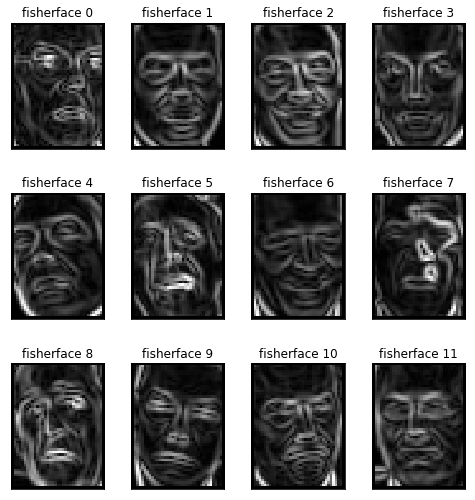

In [23]:
X_train_lda = np.zeros(X_train.shape)
X_test_lda = np.zeros(X_test.shape)

for i in range(X_train.shape[0]):
    image = exposure.rescale_intensity(X_train[i].reshape(h,w), in_range=(0, 2**10 - 1))
    X_train_lda[i] = filters.sobel(image).flat
for i in range(X_test.shape[0]):
    image = exposure.rescale_intensity(X_test[i].reshape(h,w), in_range=(0, 2**10 - 1))
    X_test_lda[i] = filters.sobel(image).flat

fisherface_titles = ["fisherface %d" %i for i in range(X_train_lda.shape[0])]
plot_gallery(X_train_lda,fisherface_titles, h, w)
plt.show()

# LPP Algorithm

In [24]:
from lpproj import LocalityPreservingProjection 

**Implement LPP Algorithm**

In [25]:
# compute a lpp(laplacainface) on the face data
lpp = LocalityPreservingProjection(n_components=150, n_neighbors = 15)
X_lpp_train = lpp.fit_transform(X_train_pca)
X_lpp_test = lpp.fit_transform(X_test_pca)

**project data to laplacianface**

In [26]:
train_lpp = np.zeros(X_train.shape)
test_lpp = np.zeros(X_test.shape)

for i in range(X_train.shape[0]):
    hog_vec, hog_vis = hog(X_train[i].reshape(h,w), visualise=True)
    train_lpp[i] = hog_vis.flat
for i in range(X_test.shape[0]):
    hog_vec, hog_vis = hog(X_test[i].reshape(h,w), visualise=True)
    test_lpp[i] = hog_vis.flat

**Using training data to fitting the SVM model**

In [27]:
#train a SVM clasification model
print("---------------Laplacianface--------------------------")
print("Fitting the SVM classifier to the training set")
t0 = time()
clf.fit(X_lpp_train, y_train)
print("--------------------------------")
print("done in %0.3fs" %(time()-t0))
print("--------------------------------")
print("Best estimator found by grid search:")
print(clf.best_estimator_)

---------------Laplacianface--------------------------
Fitting the SVM classifier to the training set
--------------------------------
done in 31.149s
--------------------------------
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


**Using the testing data to calculate the accuracy depends on SVM**

In [28]:
#Quantitative evaluation of the SVM model quality on the test set
print("---------------Laplacianface--------------------------")
print("Predicting people's names on the test set")
t0 = time()
svm_pred = clf.predict(X_lpp_test)
svc_accuracy = accuracy_score(y_test, svm_pred)*100
print("Done in %0.35s" %(time() - t0))
print("--------------------------------------------------")
print("SVM Accuracy Score: {:0.3f}%".format(svc_accuracy))
print("--------------------------------------------------")
print(classification_report(y_test, svm_pred, target_names = target_names))
print(confusion_matrix(y_test, svm_pred, labels = range(n_classes)))

---------------Laplacianface--------------------------
Predicting people's names on the test set
Done in 0.0314781665802
--------------------------------------------------
SVM Accuracy Score: 13.178%
--------------------------------------------------
                   precision    recall  f1-score   support

     Ariel Sharon       0.04      0.25      0.07         4
     Colin Powell       0.36      0.20      0.26        25
  Donald Rumsfeld       0.04      0.14      0.07         7
    George W Bush       0.39      0.10      0.16        67
Gerhard Schroeder       0.00      0.00      0.00        13
      Hugo Chavez       0.00      0.00      0.00         4
       Tony Blair       0.21      0.33      0.26         9

      avg / total       0.29      0.13      0.16       129

[[ 1  1  0  1  0  1  0]
 [ 2  5  3  3  3  8  1]
 [ 1  1  1  0  2  1  1]
 [17  6 13  7  5 11  8]
 [ 1  1  4  5  0  1  1]
 [ 0  0  0  2  2  0  0]
 [ 1  0  2  0  3  0  3]]


**Using training data fitting KNN model**

In [29]:
# Train a KNN classification model
print("---------------Laplacianface--------------------------")
print("Fitting the SVM classifier to the training set")
t0 = time()
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_lpp_train, y_train) 
print("done in %0.3fs" %(time()-t0))

---------------Laplacianface--------------------------
Fitting the SVM classifier to the training set
done in 0.005s


**Using testing data to calculate the accuracy depends on KNN**

In [30]:
#Quantitative evaluation of the KNN model quality on the test set
print("---------------Laplacianface--------------------------")
print("Predicting people's names on the test set")
t0 = time()
knn_pred = neigh.predict(X_lpp_test)

knn_accuracy = accuracy_score(y_test, knn_pred)*100
print("Done in %0.35s" %(time() - t0))
print("-------------------------------------------------")
print("KNN Accuracy Score: {:0.3f}%".format(knn_accuracy))
print("-------------------------------------------------")
print(classification_report(y_test, knn_pred, target_names = target_names))
print(confusion_matrix(y_test, knn_pred, labels = range(n_classes)))

---------------Laplacianface--------------------------
Predicting people's names on the test set
Done in 0.0567982196808
-------------------------------------------------
KNN Accuracy Score: 45.736%
-------------------------------------------------
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00         4
     Colin Powell       0.33      0.20      0.25        25
  Donald Rumsfeld       0.00      0.00      0.00         7
    George W Bush       0.51      0.81      0.63        67
Gerhard Schroeder       0.00      0.00      0.00        13
      Hugo Chavez       0.00      0.00      0.00         4
       Tony Blair       0.00      0.00      0.00         9

      avg / total       0.33      0.46      0.37       129

[[ 0  0  0  4  0  0  0]
 [ 0  5  0 19  0  0  1]
 [ 0  1  0  6  0  0  0]
 [ 1  5  2 54  0  0  5]
 [ 0  2  0 11  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  2  0  7  0  0  0]]


**Plot Laplacianfaces**

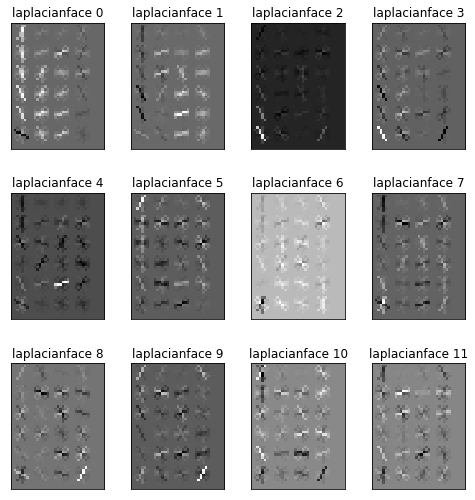

In [31]:
pca_lpp = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(train_lpp)
lppfaces = pca_lpp.components_.reshape((n_components, h, w))

# plot the gallery of the most significative Laplacianfaces
lppface_titles = ["laplacianface %d" %i for i in range(lppfaces.shape[0])]
plot_gallery(lppfaces, lppface_titles, h, w)
plt.show()

# Change the training set to calculate the accuracy using KNN model

In [32]:
from __future__ import division

pca_knn_accuracy = np.zeros(5)
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=(i+1)/10, random_state = 42)
    pca = PCA(n_components = n_components, svd_solver='randomized',whiten=True).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    neigh = KNeighborsClassifier(n_neighbors=15)
    neigh.fit(X_train_pca, y_train) 
    pca_pred = neigh.predict(X_test_pca)
    print("Training set:"+str((10-(i+1))*10)+"%, PCA using KNN Accuarcy: " + str(accuracy_score(y_test, pca_pred)))
    pca_knn_accuracy[i] =  accuracy_score(y_test, pca_pred)*100


Training set:90%, PCA using KNN Accuarcy: 0.6666666666666666
Training set:80%, PCA using KNN Accuarcy: 0.6085271317829457
Training set:70%, PCA using KNN Accuarcy: 0.4883720930232558
Training set:60%, PCA using KNN Accuarcy: 0.4748062015503876
Training set:50%, PCA using KNN Accuarcy: 0.4673913043478261


In [33]:
lda_knn_accuracy = np.zeros(5)
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=(i+1)/10, random_state = 42)
    lda = LDA(n_components=150)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    neigh = KNeighborsClassifier(n_neighbors=15)
    neigh.fit(X_train_lda, y_train) 
    lda_pred = neigh.predict(X_test_lda)
    print("Training set:"+str((10-(i+1))*10)+"%, LDA using KNN Accuarcy: " + str(accuracy_score(y_test, lda_pred)))
    lda_knn_accuracy[i] =  accuracy_score(y_test, lda_pred)*100


Training set:90%, LDA using KNN Accuarcy: 0.6666666666666666
Training set:80%, LDA using KNN Accuarcy: 0.6821705426356589
Training set:70%, LDA using KNN Accuarcy: 0.710594315245478
Training set:60%, LDA using KNN Accuarcy: 0.7267441860465116
Training set:50%, LDA using KNN Accuarcy: 0.7453416149068323


In [34]:
lpp_knn_accuracy = np.zeros(5)
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=(i+1)/10, random_state = 42)
    lpp = LocalityPreservingProjection(n_components=150, n_neighbors = 15)
    X_train_lpp = lpp.fit_transform(X_train)
    X_test_lpp = lpp.fit_transform(X_test)
    neigh = KNeighborsClassifier(n_neighbors=15)
    neigh.fit(X_train_lpp, y_train) 
    lpp_pred = neigh.predict(X_test_lpp)
    print("Training set:"+str((10-(i+1))*10)+"%, LPP using KNN Accuarcy: " + str(accuracy_score(y_test, lpp_pred)))
    lpp_knn_accuracy[i] =  accuracy_score(y_test, lpp_pred)*100

Training set:90%, LPP using KNN Accuarcy: 0.5193798449612403
Training set:80%, LPP using KNN Accuarcy: 0.46124031007751937
Training set:70%, LPP using KNN Accuarcy: 0.4289405684754522
Training set:60%, LPP using KNN Accuarcy: 0.42829457364341084
Training set:50%, LPP using KNN Accuarcy: 0.36180124223602483
